### Visualizing data from Daru containers
DARU (Data Analysis in RUby) is a library for storage, analysis, manipulation and visualization of data. You can find information about daru in its [repository](https://github.com/v0dro/daru).

GnuplotRB takes from Daru::Vector or Daru::DataFrame *name* as dataset's *title* and *index* column as *xtic*. Example:

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB

df = Daru::DataFrame.new({
  Build: [312, 630, 315, 312],
  Test: [525, 1050, 701, 514],
  Deploy: [215, 441, 370, 220]
  },
  index: ['Run A', 'Run B', 'Run C', 'Run D']
)
df[:Overall] = df[:Build] + df[:Test] + df[:Deploy]
df

,Build,Deploy,Test,Overall
Run A,312,215,525,1052
Run B,630,441,1050,2121
Run C,315,370,701,1386
Run D,312,220,514,1046


When you pass DataFrame to Plot.new it uses every column of DataFrame as a dataset with column name as dataset title:

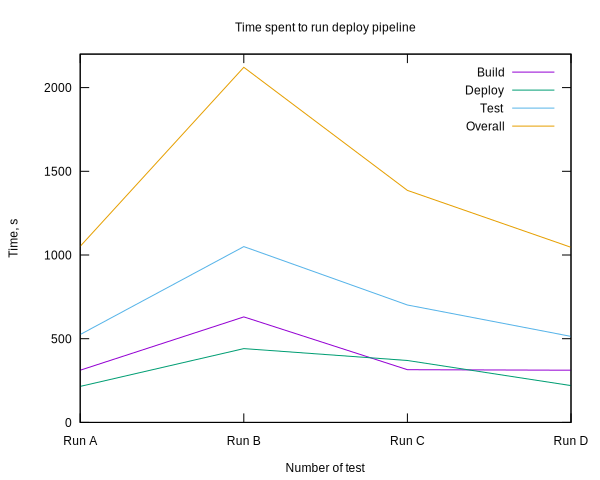

In [2]:
from_daru = Plot.new(
    df,
    style_data: 'lines',
    yrange: 0..2200,
    xlabel: 'Number of test',
    ylabel: 'Time, s',
    title: 'Time spent to run deploy pipeline'
)

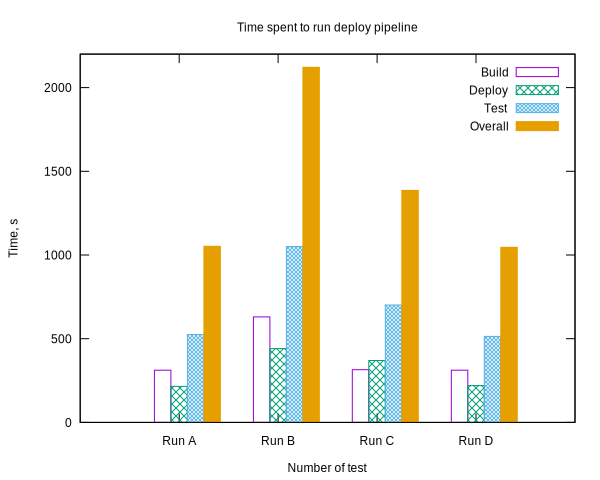

In [3]:
from_daru.options(
    style_data: 'histograms',
    style_fill: 'pattern border'
)

Datasets may be initialized both with Array or DataFrame:

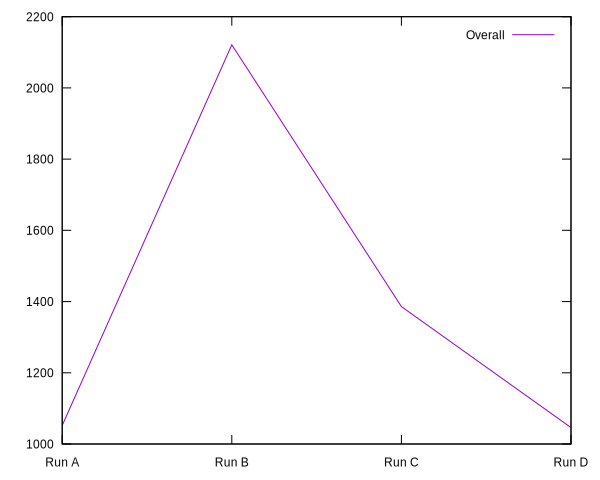

In [4]:
Plot.new([df[:Overall], with: 'lines'])

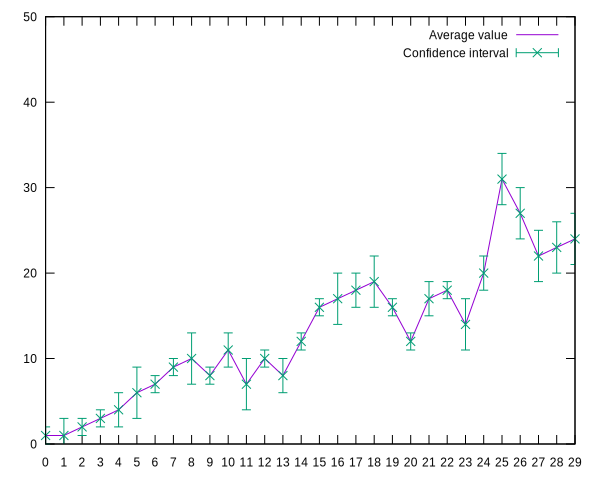

In [5]:
rows = (1..30).map do |i|
  [i * (rand(4) + 3) / 5, rand(3) + 1]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err', using: '2:3'],
  yrange: 0..50
)

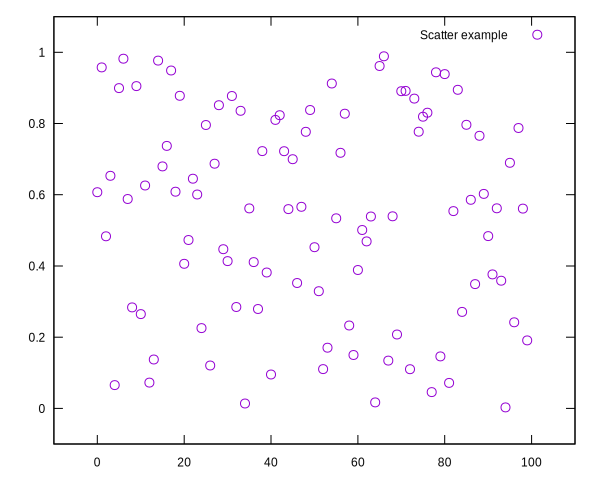

In [6]:
df = Daru::DataFrame.new({
    a: Array.new(100) {|i| i}, 
    b: 100.times.map{rand}
  },
  name: 'Scatter example'
)

Plot.new([df, using: '2:3', pt: 6, ps: 1], xrange: -10..110, yrange: -0.1..1.1)

In [7]:
frames = 100.times.map do |i|
  Plot.new([df.row[0..i], using: '2:3', pt: 6, ps: 1])
end

Animation.new(*frames, xrange: -10..110, yrange: -0.1..1.1)

#<GnuplotRB::Animation:0x00000002df69c8 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x00000002bf9a80 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002bf9a08 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002bf9990 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c03300 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c03288 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c03210 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c0baf0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c0ba78 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c0ba00 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c13188 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c13110 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c13098 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n\"3\" 3 0.6530688923354908\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c19628 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c195b0 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c19538 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n\"3\" 3 0.6530688923354908\n\"4\" 4 0.06552481296058088\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c2a838 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c2a7c0 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c2a748 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n\"3\" 3 0.6530688923354908\n\"4\" 4 0.06552481296058088\n\"5\" 5 0.8995968951542167\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c3a738 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c3a6c0 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c3a648 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n\"3\" 3 0.6530688923354908\n\"4\" 4 0.06552481296058088\n\"5\" 5 0.8995968951542167\n\"6\" 6 0.9819603370931891\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c4d270 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c4d1f8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c4d180 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.9577165127351175\n\"2\" 2 0.48315282352550204\n\"3\" 3 0.6530688923354908\n\"4\" 4 0.06552481296058088\n\"5\" 5 0.8995968951542167\n\"6\" 6 0.9819603370931891\n\"7\" 7 0.5880997515671005\n">, @options=Hamster::Hash[:ps => 1, :using => "2:3", :pt => 6, :title => :"Scatter example"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002c66900 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002c66888 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002c66810 @stored_in_file=false, @data="\"0\" 0 0.6070736861686327\n\"1\" 1 0.95771651273511